<a href="https://colab.research.google.com/github/herinnnnn/Multiple_cancer_mutation_explorer/blob/main/Cancer_mutation_explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal : to compare gene mutation patterns across five cancer types (BRCA, LUAD, COADREAD, PRAD, UCS) and visualize the key differences and overlaps.

##🧭 Project Workflow

1. Upload raw mutation files from TCGA (via cBioPortal)

2. Clean and label datasets using a reusable Python function

3. Perform individual analysis:

a) Top mutated genes

b)Mutation type distributions (bar + pie)

c) Heatmap of gene mutations across samples

4. Combine all datasets to:

a) Compare top genes across cancers

b) Analyze mutation type trends

c) Identify shared vs. unique mutations

5. Visualize results with multi-panel plots

## Breast Cancer - BRCA

In [52]:
from google.colab import files                         #uploading the mutations file for each dataset individually
uploaded = files.upload()

Saving data_mutations_brca.txt to data_mutations_brca.txt


In [53]:
import pandas as pd

df_raw1 = pd.read_csv("data_mutations_brca.txt", sep="\t")

<ipython-input-53-f0bdd919ac3e>:3: DtypeWarning: Columns (38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw1 = pd.read_csv("data_mutations_brca.txt", sep="\t")


In [54]:
# Extract only the columns we need
df_brca = df_raw1[['Hugo_Symbol', 'Variant_Classification', 'Tumor_Sample_Barcode']].copy()

# Add a label for cancer type
df_brca['Cancer_Type'] = 'BRCA'

df_brca.head()

,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,Cancer_Type
0,GATA3,Frame_Shift_Ins,TCGA-3C-AAAU-01,BRCA
1,MALAT1,RNA,TCGA-3C-AAAU-01,BRCA
2,CD248,Missense_Mutation,TCGA-3C-AAAU-01,BRCA
3,NAALAD2,Intron,TCGA-3C-AAAU-01,BRCA
4,CNPY2,5'UTR,TCGA-3C-AAAU-01,BRCA


## Lung Cancer - LUAD

In [55]:
from google.colab import files
uploaded = files.upload()

Saving data_mutations_lung.txt to data_mutations_lung (1).txt


In [56]:
df_raw2 = pd.read_csv("data_mutations_lung.txt", sep="\t")

<ipython-input-56-75694ac97b8d>:1: DtypeWarning: Columns (38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw2 = pd.read_csv("data_mutations_lung.txt", sep="\t")


In [57]:
df_luad = df_raw2[['Hugo_Symbol', 'Variant_Classification', 'Tumor_Sample_Barcode']].copy()

df_luad['Cancer_Type'] = 'LUAD'

df_luad.head()

,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,Cancer_Type
0,CPN1,Missense_Mutation,TCGA-05-4244-01,LUAD
1,MKI67,Silent,TCGA-05-4244-01,LUAD
2,NEBL,In_Frame_Del,TCGA-05-4244-01,LUAD
3,ANKRD30BP3,RNA,TCGA-05-4244-01,LUAD
4,ERCC6,Silent,TCGA-05-4244-01,LUAD


## Colorectal cancer - COADREAD

In [58]:
from google.colab import files
uploaded = files.upload()

Saving data_mutations_coadread.txt to data_mutations_coadread (1).txt


In [59]:
df_raw3 = pd.read_csv("data_mutations_coadread.txt", sep="\t")

<ipython-input-59-9033d3189536>:1: DtypeWarning: Columns (4,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw3 = pd.read_csv("data_mutations_coadread.txt", sep="\t")


In [60]:
df_coadread = df_raw3[['Hugo_Symbol', 'Variant_Classification', 'Tumor_Sample_Barcode']].copy()

df_coadread['Cancer_Type'] = 'COADREAD'

df_coadread.head()

,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,Cancer_Type
0,DMBT1,Silent,TCGA-3L-AA1B-01,COADREAD
1,C10orf90,Missense_Mutation,TCGA-3L-AA1B-01,COADREAD
2,WDFY4,Missense_Mutation,TCGA-3L-AA1B-01,COADREAD
3,PRKCQ,Missense_Mutation,TCGA-3L-AA1B-01,COADREAD
4,DYNC2H1,Missense_Mutation,TCGA-3L-AA1B-01,COADREAD


## Prostate Cancer - PRAD

In [61]:
from google.colab import files
uploaded = files.upload()

Saving data_mutations_prad.txt to data_mutations_prad (1).txt


In [62]:
df_raw4 = pd.read_csv("data_mutations_prad.txt", sep="\t")

<ipython-input-62-f7c445df3ca6>:1: DtypeWarning: Columns (38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw4 = pd.read_csv("data_mutations_prad.txt", sep="\t")


In [63]:
df_prad = df_raw4[['Hugo_Symbol', 'Variant_Classification', 'Tumor_Sample_Barcode']].copy()

df_prad['Cancer_Type'] = 'PRAD'

df_prad.head()

,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,Cancer_Type
0,SVIL,Missense_Mutation,TCGA-2A-A8VL-01,PRAD
1,AASDHPPT,Translation_Start_Site,TCGA-2A-A8VL-01,PRAD
2,LDHC,Missense_Mutation,TCGA-2A-A8VL-01,PRAD
3,OR5D16,Silent,TCGA-2A-A8VL-01,PRAD
4,DNHD1,Missense_Mutation,TCGA-2A-A8VL-01,PRAD


## Uterine Cancer - UCS

In [64]:
from google.colab import files
uploaded = files.upload()

Saving data_mutations_ucs.txt to data_mutations_ucs (1).txt


In [65]:
df_raw5 = pd.read_csv("data_mutations_ucs.txt", sep="\t")

In [66]:
df_ucs = df_raw5[['Hugo_Symbol', 'Variant_Classification', 'Tumor_Sample_Barcode']].copy()

df_ucs['Cancer_Type'] = 'UCS'

df_ucs.head()

,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,Cancer_Type
0,NRAP,Nonsense_Mutation,TCGA-N5-A4R8-01,UCS
1,ATE1,Frame_Shift_Del,TCGA-N5-A4R8-01,UCS
2,MRGPRX4,5'UTR,TCGA-N5-A4R8-01,UCS
3,AHNAK,Missense_Mutation,TCGA-N5-A4R8-01,UCS
4,RAD9A,Missense_Mutation,TCGA-N5-A4R8-01,UCS


### Inspection and cleaning of all the datasets

In [67]:
def inspect_and_clean(df, cancer_type):                            #define a function that works for all types of cancer
    print(f"\n🔍 Initial Inspection for {cancer_type}")

    # Shape
    print(f"• Shape: {df.shape[0]} rows × {df.shape[1]} columns")

    # Columns
    print(f"• Columns: {df.columns.tolist()}")

    # Missing values
    missing = df.isnull().sum()
    print(f"\n• Missing Values:")
    print(missing[missing > 0] if missing.sum() > 0 else "No missing values.")

    # Duplicate rows
    dup_count = df.duplicated().sum()
    print(f"\n• Duplicate Rows: {dup_count}")
    if dup_count > 0:
        df.drop_duplicates(inplace=True)
        print(f"→ Removed {dup_count} duplicate rows. New shape: {df.shape}")
    else:
        print("→ No duplicates found.")

    # Number of unique values per column
    print(f"\n• Unique Values Per Column:")
    for col in df.columns:
        print(f"   - {col}: {df[col].nunique()} unique values")

    return df

In [68]:
df_brca = inspect_and_clean(df_brca, 'BRCA')
df_luad = inspect_and_clean(df_luad, 'LUAD')
df_coadread = inspect_and_clean(df_coadread, 'COADREAD')
df_prad = inspect_and_clean(df_prad, 'PRAD')
df_ucs = inspect_and_clean(df_ucs, 'UCS')


🔍 Initial Inspection for BRCA
• Shape: 130495 rows × 4 columns
• Columns: ['Hugo_Symbol', 'Variant_Classification', 'Tumor_Sample_Barcode', 'Cancer_Type']

• Missing Values:
No missing values.

• Duplicate Rows: 9652
→ Removed 9652 duplicate rows. New shape: (120843, 4)

• Unique Values Per Column:
   - Hugo_Symbol: 18987 unique values
   - Variant_Classification: 17 unique values
   - Tumor_Sample_Barcode: 1009 unique values
   - Cancer_Type: 1 unique values

🔍 Initial Inspection for LUAD
• Shape: 243229 rows × 4 columns
• Columns: ['Hugo_Symbol', 'Variant_Classification', 'Tumor_Sample_Barcode', 'Cancer_Type']

• Missing Values:
No missing values.

• Duplicate Rows: 27432
→ Removed 27432 duplicate rows. New shape: (215797, 4)

• Unique Values Per Column:
   - Hugo_Symbol: 19117 unique values
   - Variant_Classification: 17 unique values
   - Tumor_Sample_Barcode: 562 unique values
   - Cancer_Type: 1 unique values

🔍 Initial Inspection for COADREAD
• Shape: 332610 rows × 4 columns
•

### Individual Analysis

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cancer_overview(df, cancer_type):
    # Set figure size and layout
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f"🔬 {cancer_type} Mutation Overview", fontsize=18)

    # 1. Top mutated genes (bar)
    top_genes = df['Hugo_Symbol'].value_counts().head(10)
    axs[0, 0].bar(top_genes.index, top_genes.values, color='salmon')
    axs[0, 0].set_title("Top 10 Mutated Genes")
    axs[0, 0].tick_params(axis='x', rotation=45)

    # 2. Mutation type distribution (bar)
    mutation_types = df['Variant_Classification'].value_counts()
    axs[0, 1].bar(mutation_types.index, mutation_types.values, color='skyblue')
    axs[0, 1].set_title("Mutation Types")
    axs[0, 1].tick_params(axis='x', rotation=45)

    # 3. Mutation type distribution (pie)
    axs[0, 2].pie(mutation_types.head(6), labels=mutation_types.head(6).index,
                 autopct='%1.1f%%', startangle=140)
    axs[0, 2].set_title("Top Mutation Types (Pie)")

    # 4. Heatmap (gene vs sample)
    pivot = pd.crosstab(df['Hugo_Symbol'], df['Tumor_Sample_Barcode'])
    top_genes_heat = df['Hugo_Symbol'].value_counts().head(10).index
    pivot = pivot.loc[pivot.index.intersection(top_genes_heat)]

    if pivot.shape[1] > 1:
        sns.heatmap(pivot, cmap="Reds", ax=axs[1, 0])
        axs[1, 0].set_title("Heatmap: Top Genes × Samples")
    else:
        axs[1, 0].text(0.5, 0.5, 'Not enough sample variation',
                      horizontalalignment='center', verticalalignment='center')
        axs[1, 0].set_title("Heatmap Skipped")

    # 5. Placeholder for expansion
    axs[1, 1].axis('off')
    axs[1, 2].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


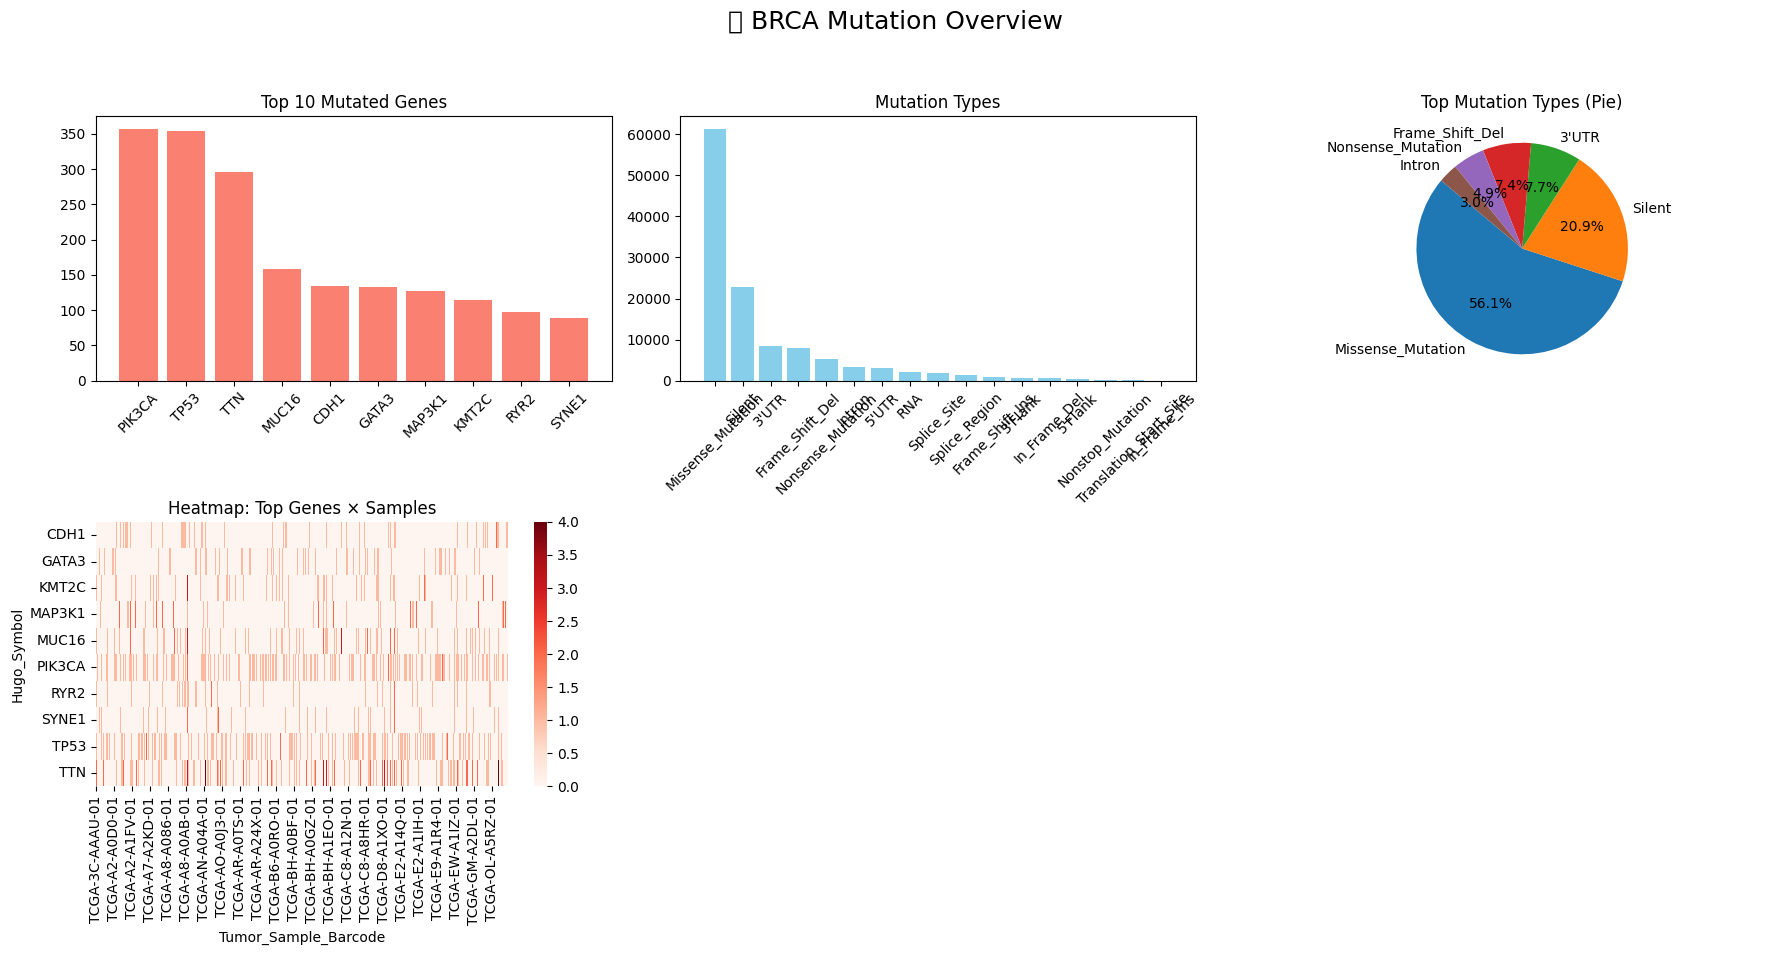

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


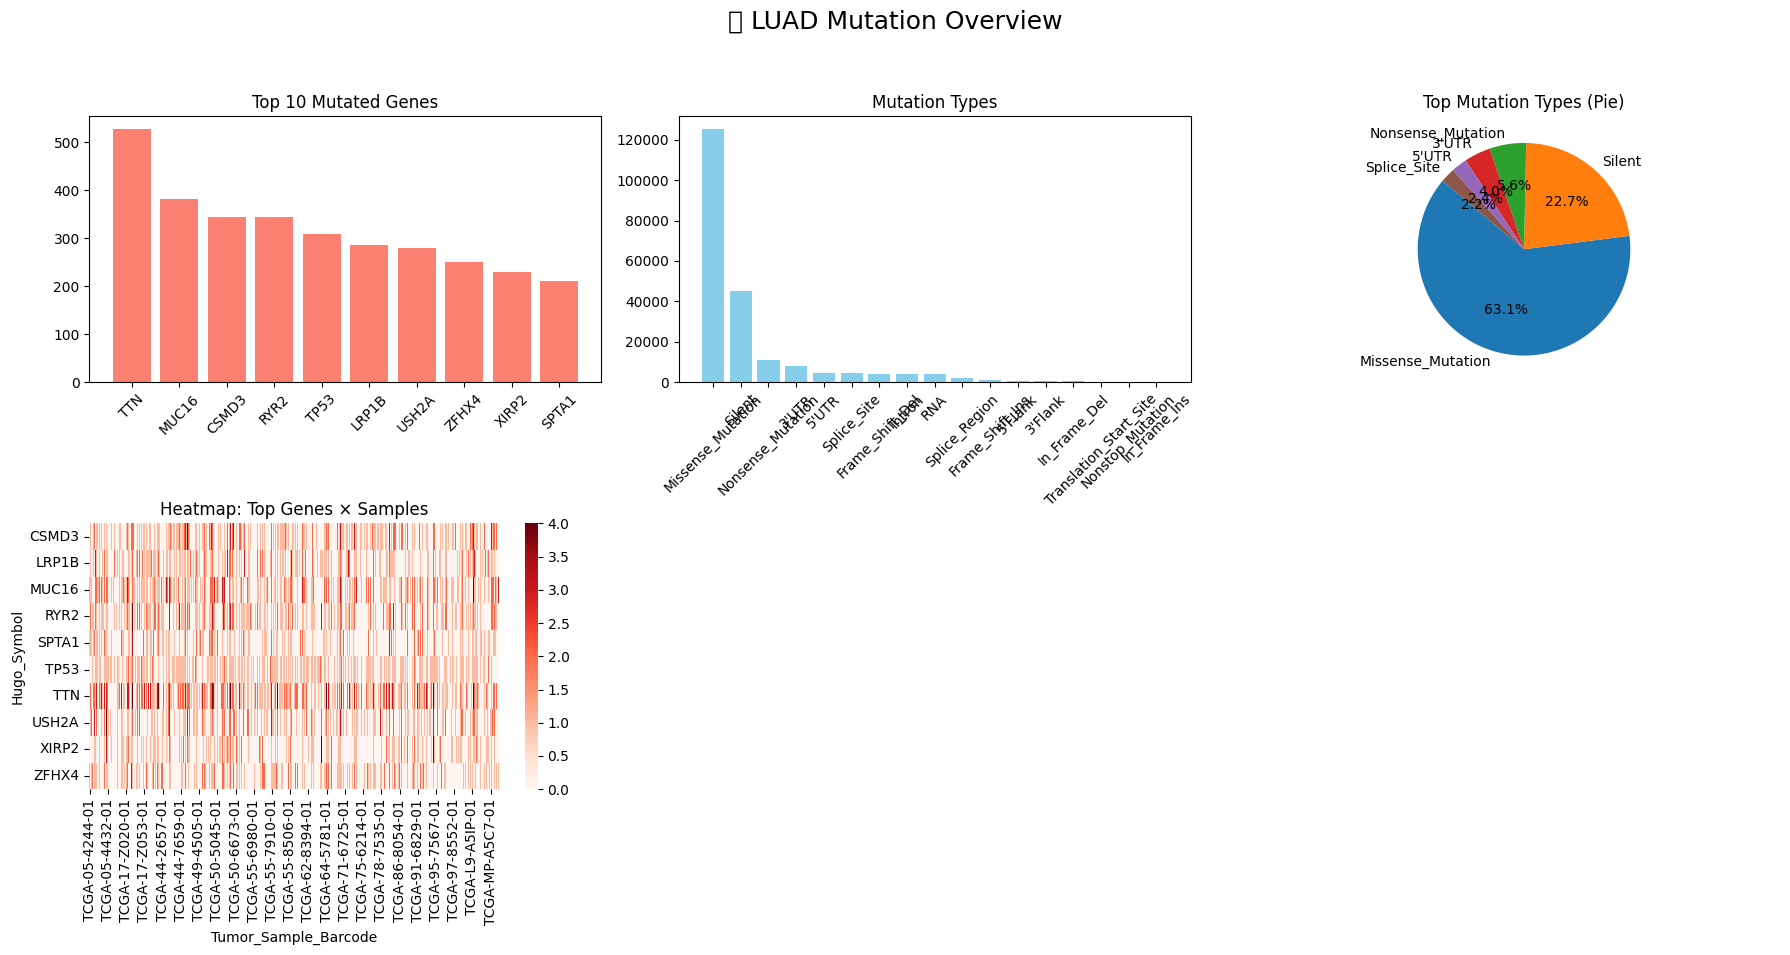

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


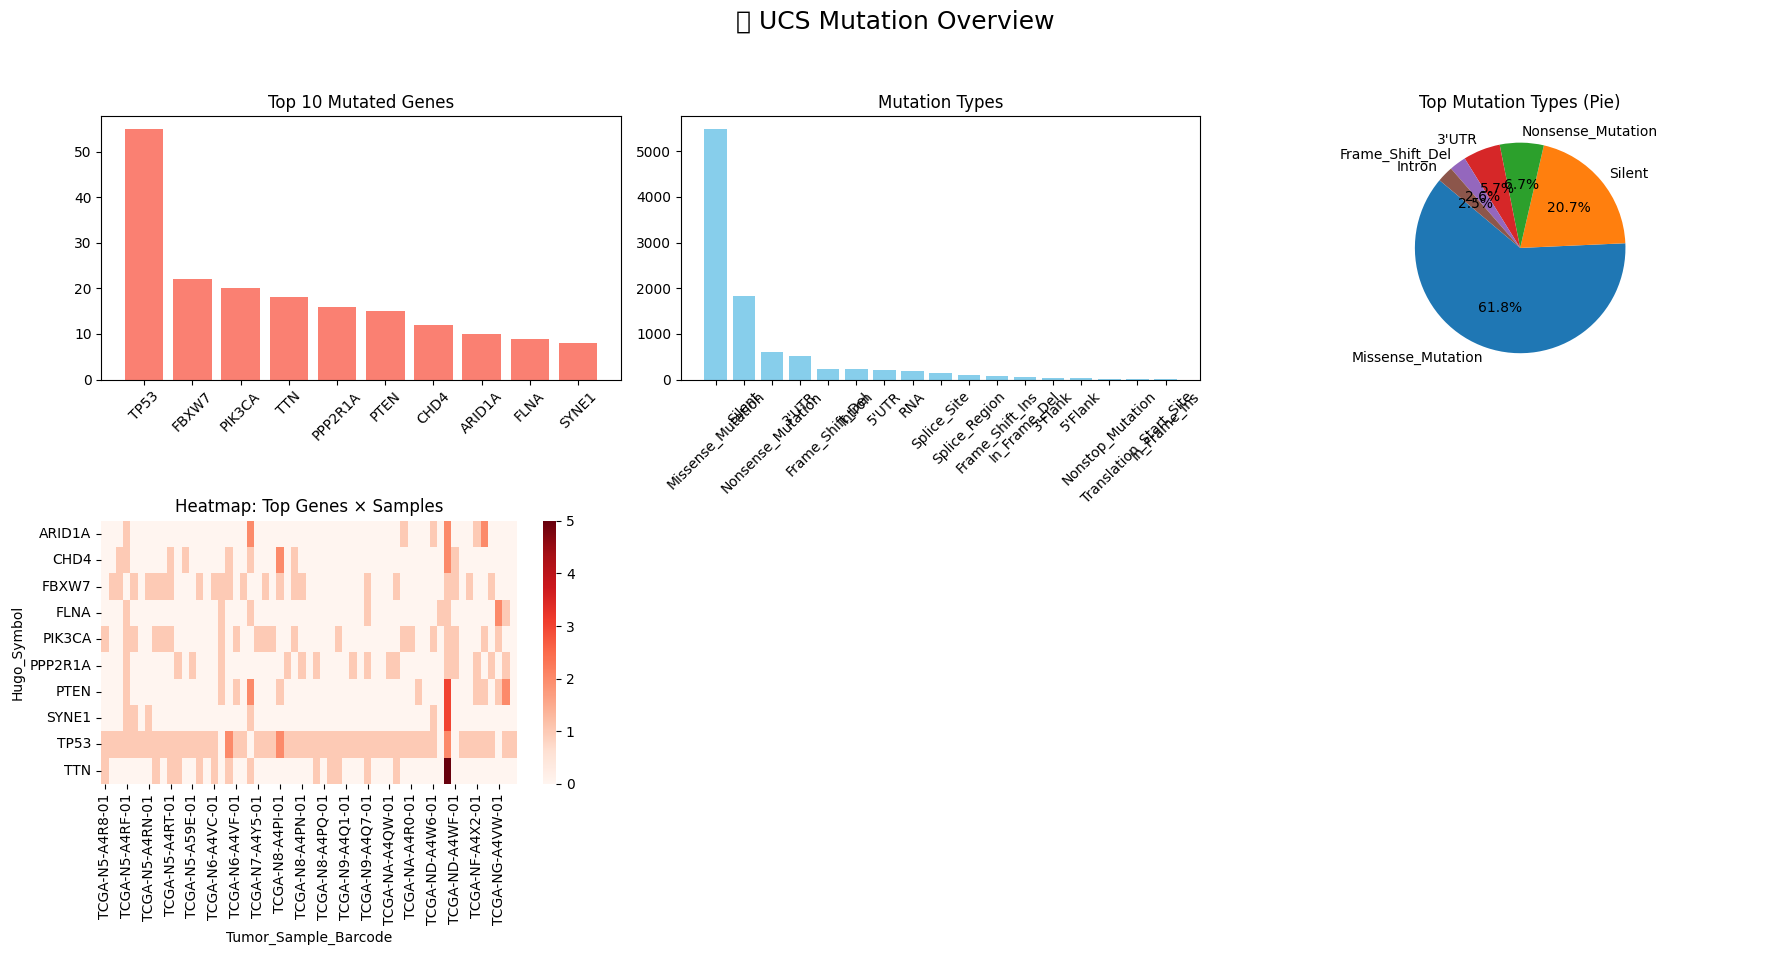

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


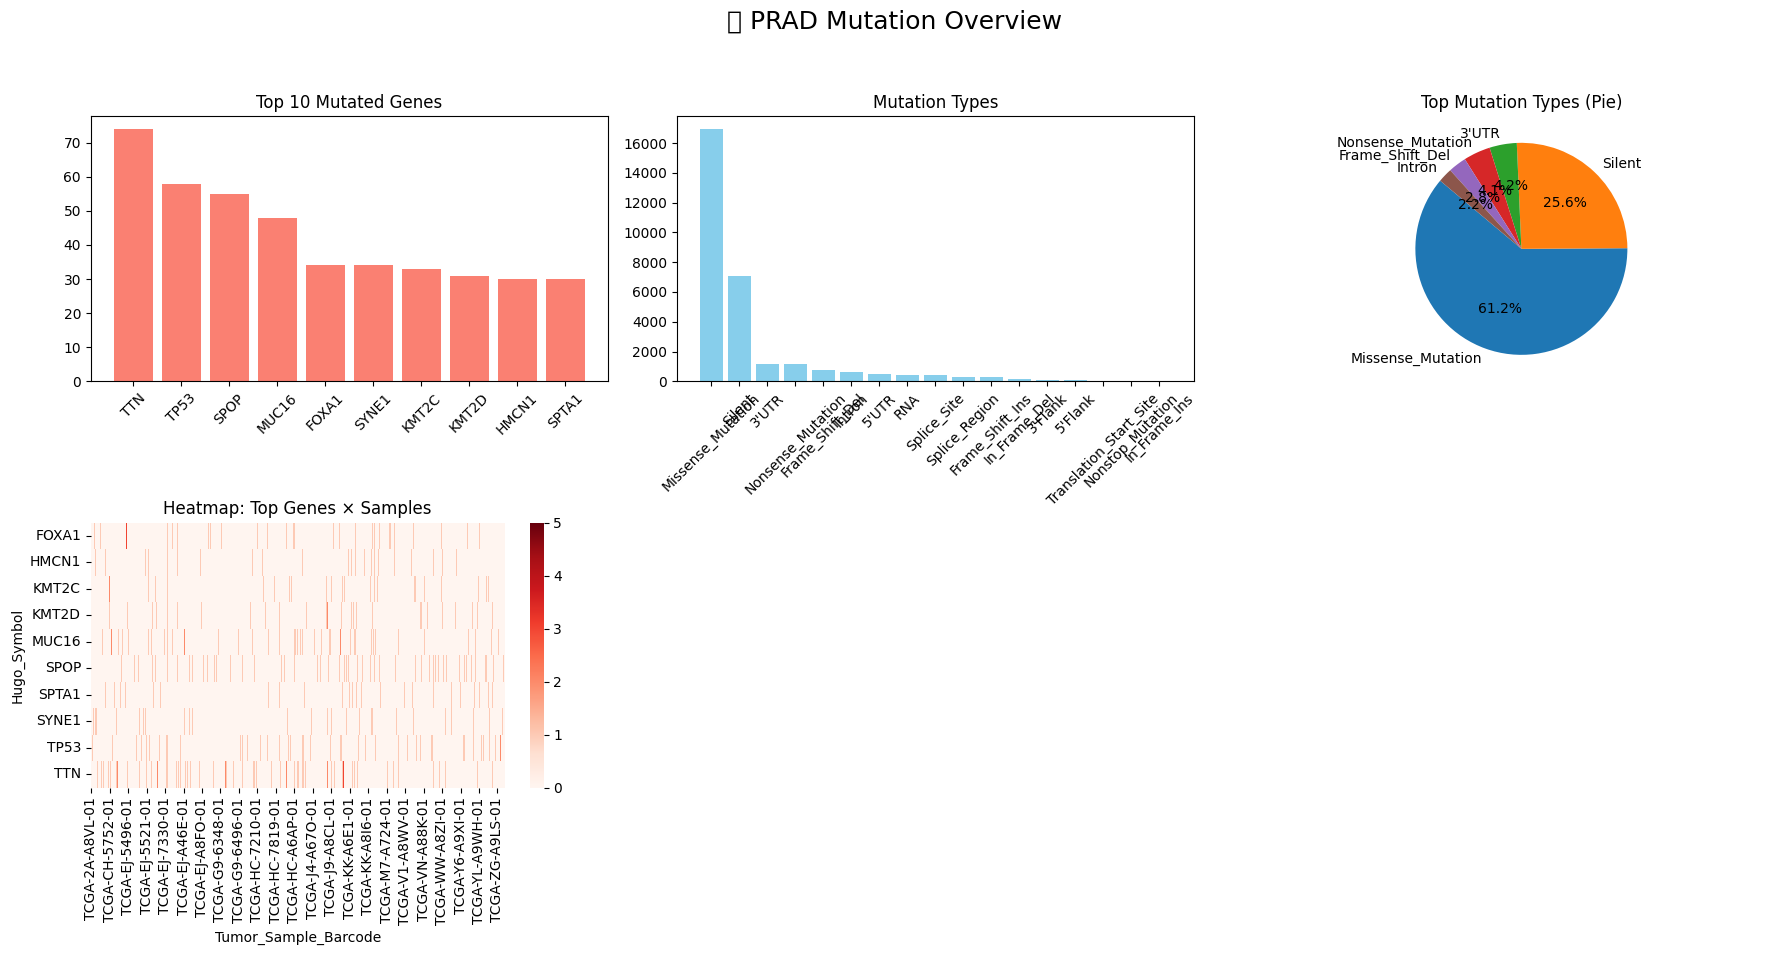

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


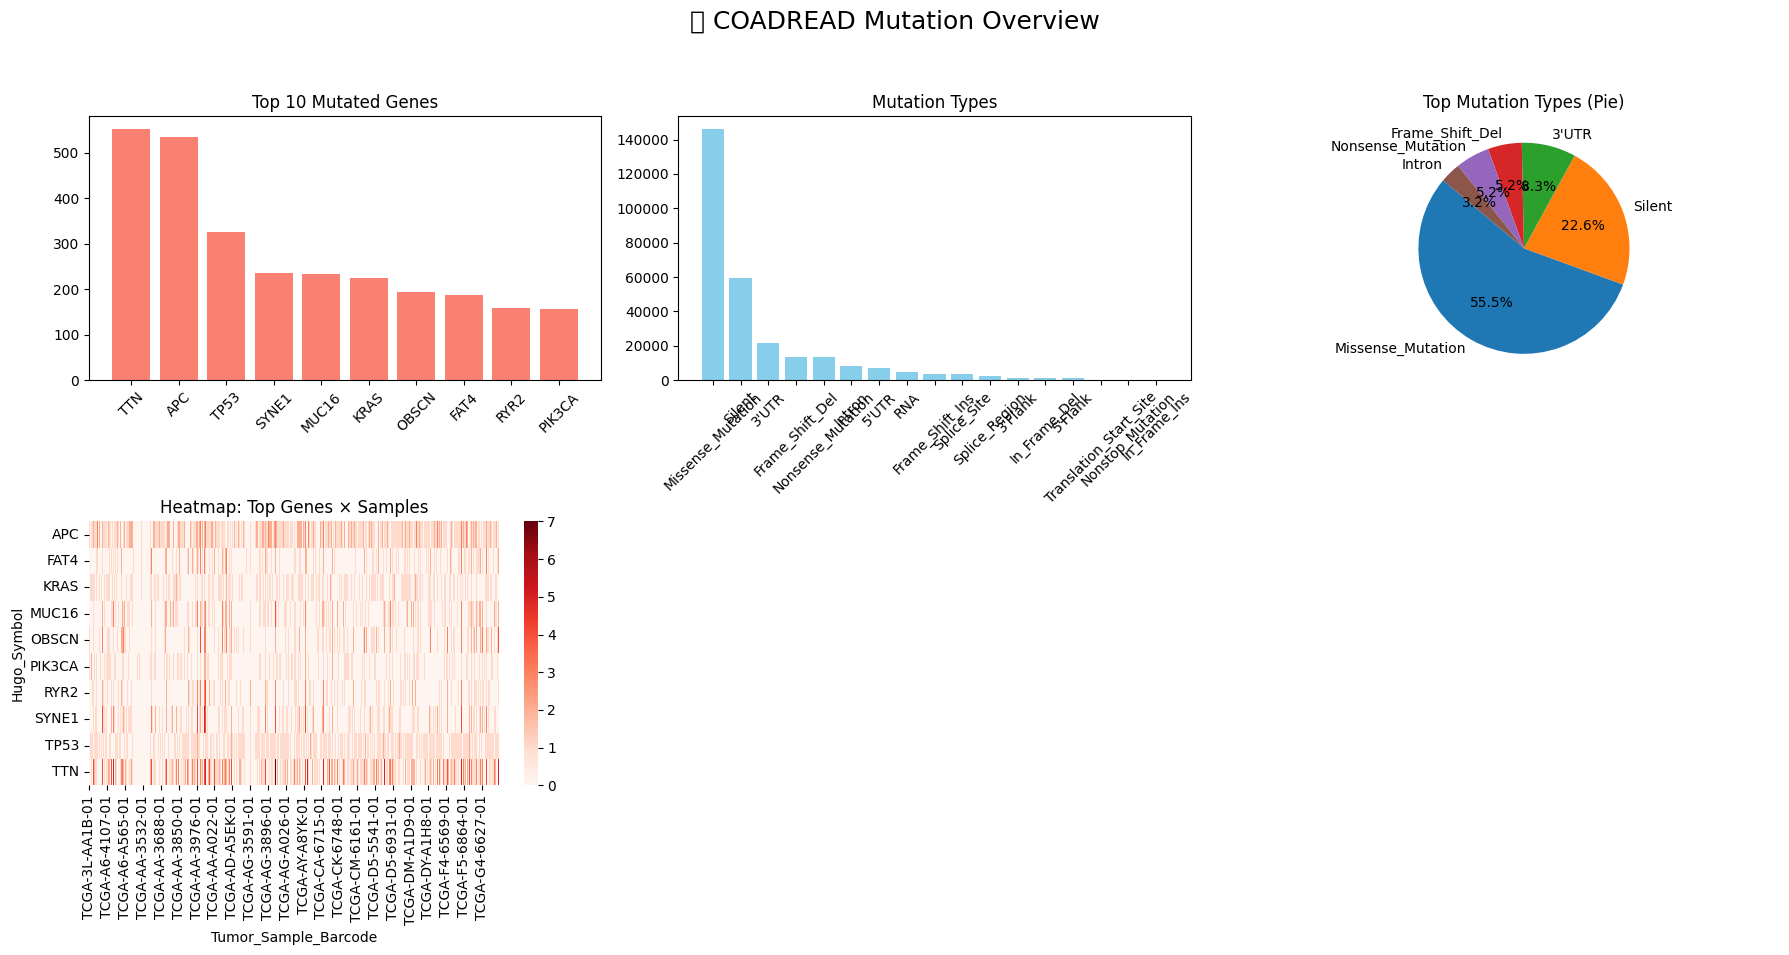

In [82]:
plot_cancer_overview(df_brca, "BRCA")
plot_cancer_overview(df_luad, "LUAD")
plot_cancer_overview(df_ucs, "UCS")
plot_cancer_overview(df_prad, "PRAD")
plot_cancer_overview(df_coadread, "COADREAD")

## Summary of the analysis

In [71]:
def summarize_mutation_insights(df, cancer_type, top_n=5):
    print(f"\n📝 Summary for {cancer_type}")

    # Top genes
    top_genes = df['Hugo_Symbol'].value_counts().head(top_n)
    print(f"• Top {top_n} mutated genes: {', '.join(top_genes.index)}")

    # Most common mutation type
    top_mutation_type = df['Variant_Classification'].value_counts().idxmax()
    print(f"• Most common mutation type: {top_mutation_type}")

    # Unique genes (optional)
    print(f"• Unique mutated genes: {df['Hugo_Symbol'].nunique()} total")

    # Most mutated gene
    print(f"• Most mutated gene overall: {top_genes.idxmax()} with {top_genes.max()} mutations")


In [72]:
summarize_mutation_insights(df_brca, 'BRCA')
summarize_mutation_insights(df_luad, 'LUAD')
summarize_mutation_insights(df_ucs, 'UCS')
summarize_mutation_insights(df_prad, 'PRAD')
summarize_mutation_insights(df_coadread, 'COADREAD')


📝 Summary for BRCA
• Top 5 mutated genes: PIK3CA, TP53, TTN, MUC16, CDH1
• Most common mutation type: Missense_Mutation
• Unique mutated genes: 18987 total
• Most mutated gene overall: PIK3CA with 357 mutations

📝 Summary for LUAD
• Top 5 mutated genes: TTN, MUC16, CSMD3, RYR2, TP53
• Most common mutation type: Missense_Mutation
• Unique mutated genes: 19117 total
• Most mutated gene overall: TTN with 528 mutations

📝 Summary for UCS
• Top 5 mutated genes: TP53, FBXW7, PIK3CA, TTN, PPP2R1A
• Most common mutation type: Missense_Mutation
• Unique mutated genes: 6795 total
• Most mutated gene overall: TP53 with 55 mutations

📝 Summary for PRAD
• Top 5 mutated genes: TTN, TP53, SPOP, MUC16, FOXA1
• Most common mutation type: Missense_Mutation
• Unique mutated genes: 12866 total
• Most mutated gene overall: TTN with 74 mutations

📝 Summary for COADREAD
• Top 5 mutated genes: TTN, APC, TP53, SYNE1, MUC16
• Most common mutation type: Missense_Mutation
• Unique mutated genes: 20047 total
• Mo

# Comparison of different types of cancer

In [73]:
# Combine into one big DataFrame
df_combined = pd.concat([df_brca, df_luad, df_ucs, df_prad, df_coadread], ignore_index=True)

# Check structure
print(df_combined.shape)
df_combined['Cancer_Type'].value_counts()

(666338, 4)


,count
Cancer_Type,
COADREAD,289934
LUAD,215797
BRCA,120843
PRAD,30038
UCS,9726


### Mutation type distribution across cancers

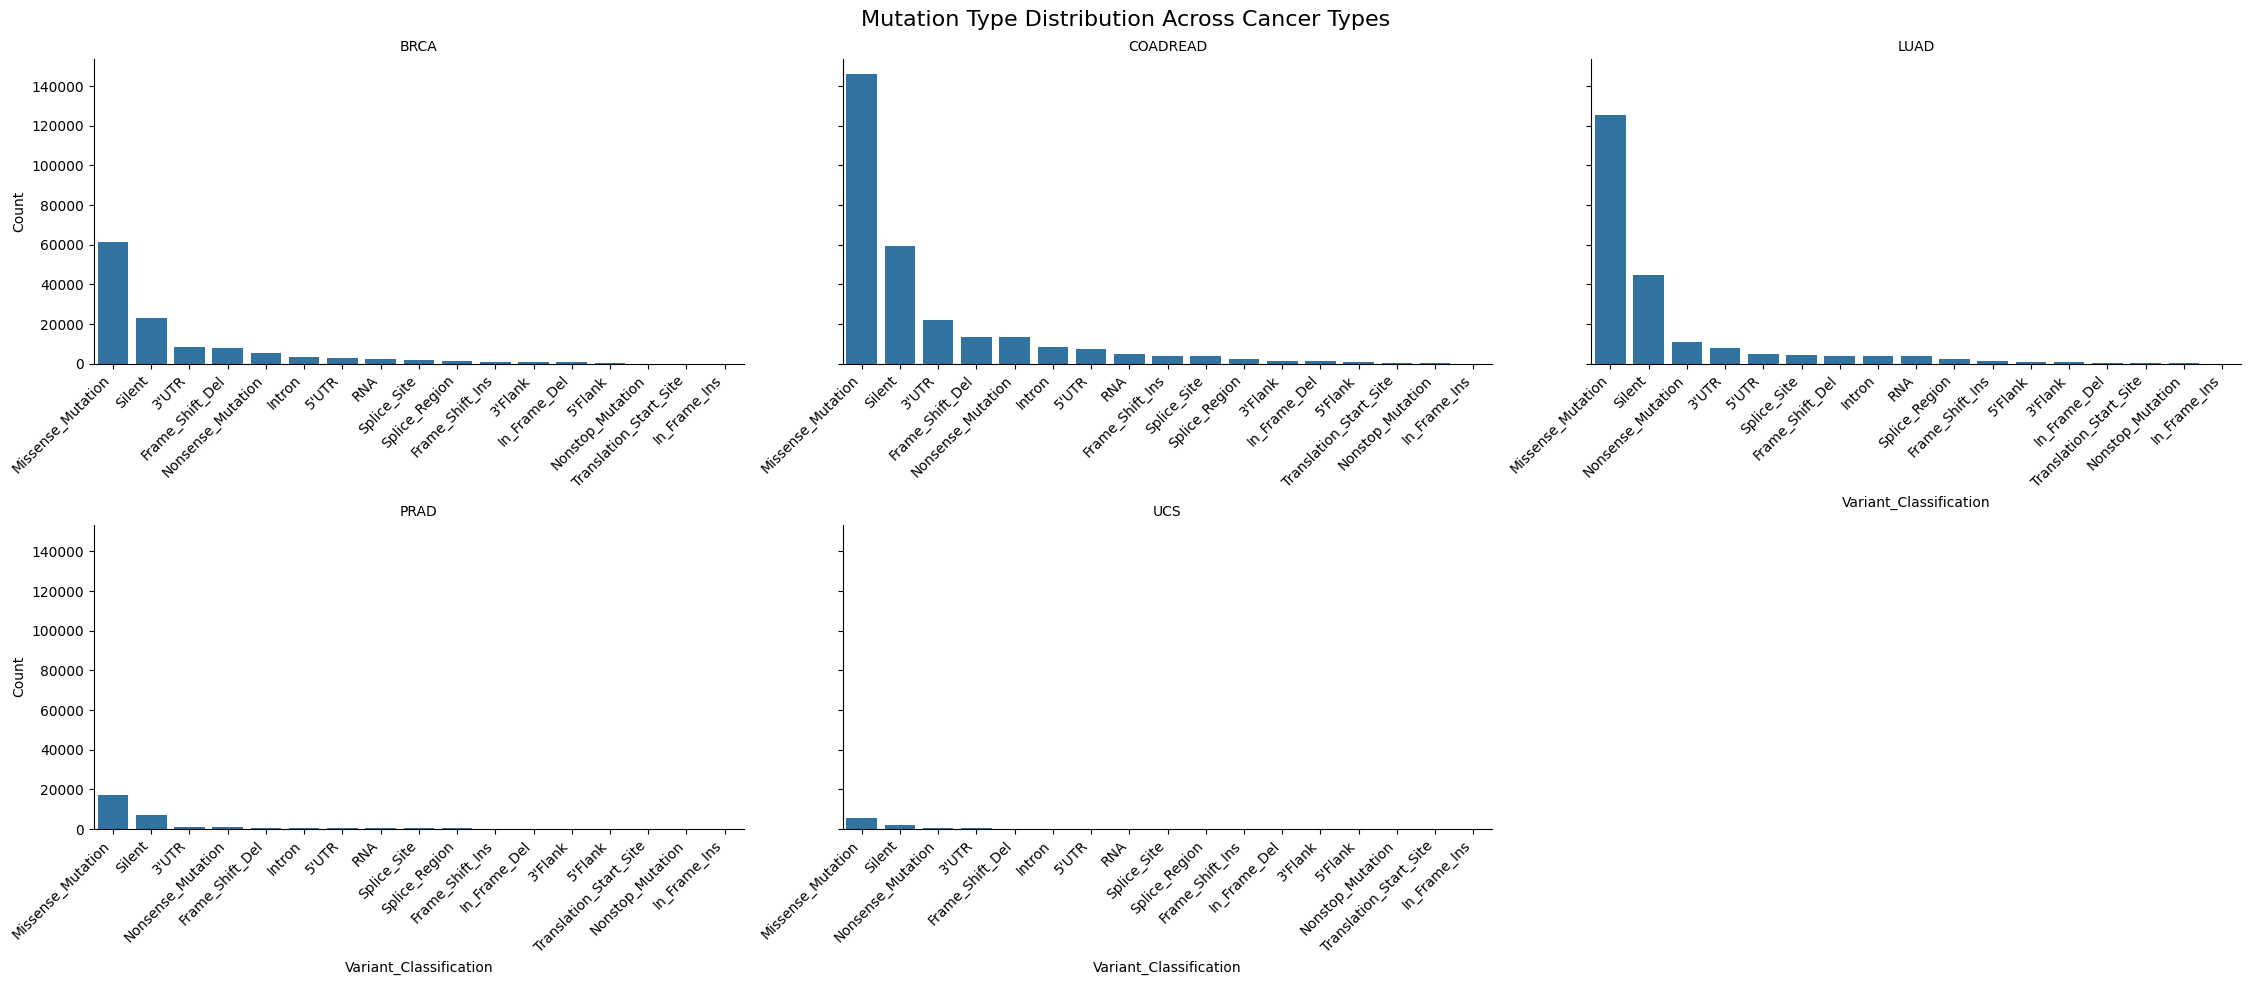

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort mutation types by total count for better visuals
mutation_type_dist = df_combined.groupby(['Cancer_Type', 'Variant_Classification']).size().reset_index(name='Count')

mutation_type_dist = mutation_type_dist.sort_values(by=['Cancer_Type', 'Count'], ascending=[True, False])

# Comparing mutation types across cancers
g = sns.catplot(
    data=mutation_type_dist,
    x='Variant_Classification',
    y='Count',
    col='Cancer_Type',
    kind='bar',
    col_wrap=3,
    height=5,
    aspect=1.5,
    sharex=False
)

g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, horizontalalignment='right')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Mutation Type Distribution Across Cancer Types", fontsize=16)

plt.tight_layout()
plt.show()


## Top 20 genes across cancers

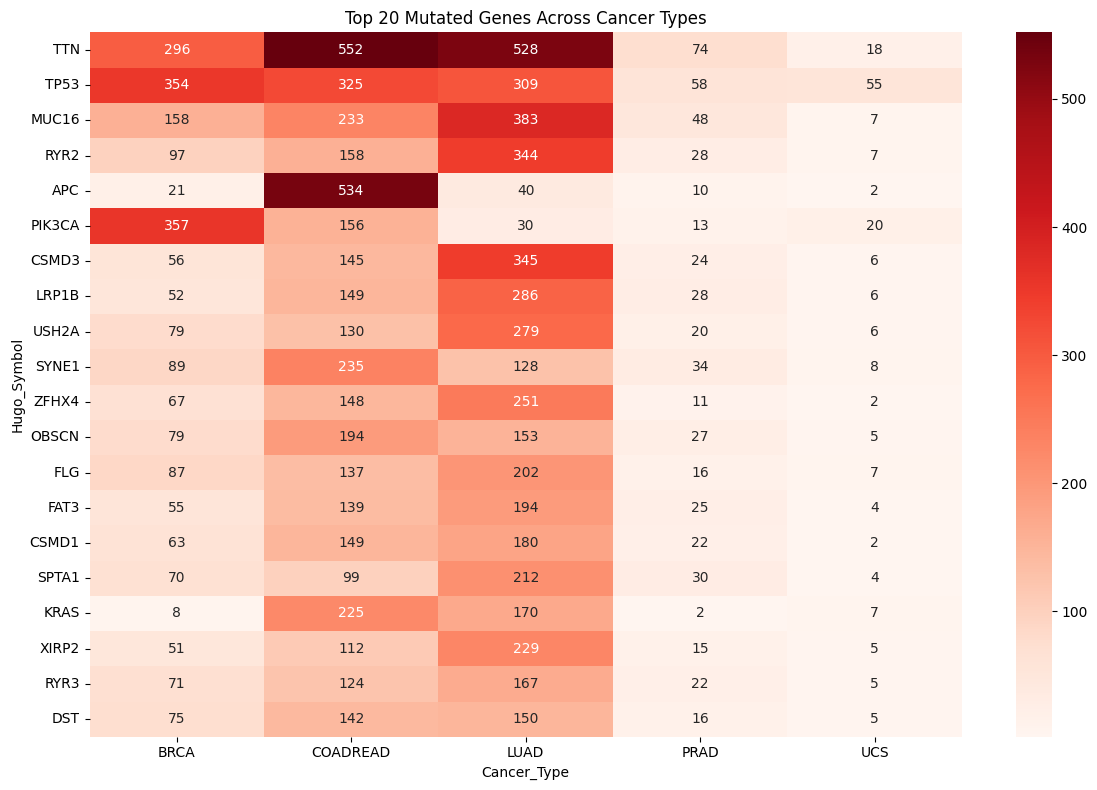

In [77]:
# Cross-tab of gene vs cancer
pivot_table = pd.crosstab(df_combined['Hugo_Symbol'], df_combined['Cancer_Type'])

# Keep top 20 genes overall
top_20_genes = df_combined['Hugo_Symbol'].value_counts().head(20).index
heatmap_data = pivot_table.loc[top_20_genes]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt='d')
plt.title("Top 20 Mutated Genes Across Cancer Types")
plt.tight_layout()
plt.show()


## Checking similarities and differences

In [78]:
# Unique genes per cancer
genes_per_cancer = df_combined.groupby('Cancer_Type')['Hugo_Symbol'].apply(set)

# Shared genes
shared_genes = set.intersection(*genes_per_cancer)
print(f"🔗 Shared across all cancers: {len(shared_genes)} genes")

# Unique to each
unique_genes = {cancer: genes - shared_genes for cancer, genes in genes_per_cancer.items()}

for cancer, genes in unique_genes.items():
    print(f"🧬 {cancer} has {len(genes)} unique genes")


🔗 Shared across all cancers: 5100 genes
🧬 BRCA has 13887 unique genes
🧬 COADREAD has 14947 unique genes
🧬 LUAD has 14017 unique genes
🧬 PRAD has 7766 unique genes
🧬 UCS has 1695 unique genes


# Key results

1. Missense_Mutation was the most dominant mutation type across all five cancer types, reinforcing its role as the most common functional alteration in tumorigenesis.

2. TTN appeared among the top 5 most mutated genes in 4 out of 5 cancers, with the highest mutation count in COADREAD (552) and LUAD (528), suggesting its relevance as a recurrent passenger mutation or potential biomarker.

3. TP53 was mutated in all five cancers, acting as a universal tumor suppressor, but was the top mutated gene only in UCS, highlighting its more critical role in gynecologic malignancies.

4. BRCA1 and BRCA2 were only prominently mutated in BRCA, as expected, confirming the specificity of these genes in hereditary breast and ovarian cancer syndromes.

5. COADREAD had the highest number of unique mutated genes (14,947), suggesting greater mutation burden or heterogeneity compared to other cancers.

6. UCS had the fewest unique genes (1,695) and the lowest top mutation counts overall, possibly indicating a smaller mutation dataset or different mutation mechanisms.

7. Only 5,100 genes were shared across all cancers, meaning a large proportion of mutations are cancer-specific, supporting the importance of personalized genomics in oncology.